In [ ]:
from examples.train_model import main
import torch 
import importlib
from examples.benchmark import local_get_args
from utils.rng import set_seed
from examples.train_and_visu_non_recurrent import evaluate_config
import matplotlib.pyplot as plt
import numpy as np
import os 
import geopandas as gpd
import datetime 

def plot_heatmap(M, xlabel,ylabel,title=None,cmap='hot',figsize=(15, 15)):
    fig, ax = plt.subplots(figsize=figsize)
    heatmap = ax.imshow(M, cmap=cmap, interpolation='nearest', aspect='auto')

    ax.set_xticks(range(len(xlabel)), labels=xlabel,
                  rotation=45, ha="right", rotation_mode="anchor")
    ax.set_yticks(range(len(ylabel)), labels=ylabel)

    fig.colorbar(heatmap,ax=ax)
    if title:
        ax.set_title(title)
    fig.tight_layout()
    plt.show()

def is_morning_peak(predicted_dates_h):
    return (predicted_dates_h.dt.time >= datetime.time(7, 30)) & (predicted_dates_h.dt.time <= datetime.time(9, 00))

def is_evening_peak(predicted_dates_h):
    return (predicted_dates_h.dt.time >= datetime.time(17, 00)) & (predicted_dates_h.dt.time <= datetime.time(19, 00))

def is_weekday(predicted_dates_h):
    return (predicted_dates_h.dt.dayofweek < 5)

## Analysing Subway-In

In [ ]:
station = ['PAR']
target_data = 'subway_in' # 'subway_in' # 
model_name = 'STAEformer' # 'STGCN', 'ASTGCN' # 'STGformer' #'STAEformer' # 'DSTRformer'

config_file = importlib.import_module(f"constants.config_by_datasets.{target_data}.{model_name}")
importlib.reload(config_file)
modification = config_file.config
SEED = config_file.SEED

modification.update({'num_workers' : 4, # 0,1,2, 4, 6, 8 ... A l'IDRIS ils bossent avec 6 num workers par A100 80GB
                    'persistent_workers' : True ,# False 
                    'pin_memory' : True ,# False 
                    'prefetch_factor' : 4, # None, 2,3,4,5 ... 
                    'drop_last' : False,  # True
                    'mixed_precision' : False, # True # False
                    'torch_compile' : False, # 'compile' # 'jit_script' #'trace' # False
                    'device': torch.device('cuda:0'),
                    'epochs': 40
})

args_init = local_get_args(model_name,
                args_init = None,
                dataset_names=modification['dataset_names'],
                dataset_for_coverage=modification['dataset_for_coverage'],
                modification = modification)

set_seed(SEED)


# Run the script
fold_to_evaluate=[args_init.K_fold-1]

if False:
    trial_id = f"{args_init.model_name}_{'_'.join(args_init.dataset_names)}_fold_{str(fold_to_evaluate[0])}_epochs_{args_init.epochs}"
    save_folder = f"K_fold_validation/training_wo_HP_tuning/{trial_id}"
    print(f"Save folder: {save_folder}")
    trainer,ds,model,args = main(fold_to_evaluate,save_folder,modification)

training_mode_to_visualise = ['test'] # ['test','valid','train']
(trainer,ds,ds_no_shuffle,args) = evaluate_config(args_init=args_init,
                                                  modification=modification,
                                                  fold_to_evaluate= fold_to_evaluate,
                                                  station=station,
                                                   training_mode_to_visualise=training_mode_to_visualise,
                                                   type_POIs = ['iris','iris','iris'],#['iris','iris','iris','iris','iris'],  #'stadium'
                                                   spatial_units = ['Charmettes', 'Charles Hernu', 'Les Brotteaux'], #['Charmettes', 'Charles Hernu', 'Les Brotteaux', 'Bellecombe-Thiers', 'Tonkin Sud'],  #'Matmut Stadium Gerland',
                                                   apps = ['Deezer'], #['Instagram','Google_Maps','Twitter'],
                                                   POI_or_stations = ['POI','POI','POI'],#['POI','POI','POI','POI','POI',], #'POI',
                                                   transfer_modes =['DL'], #['DL','UL'],
                                                   expanded= '',
                                                   individual_poi = False,
                                                   sum_ts_pois = True
                                                   )

/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Training and Hyper-parameter tuning with Ray is not possible

----------------------------------------
Loading the Complete Dataset for K-fold splitting
Coverage Period: 7392 elts between 2019-03-16 00:00:00 and 2019-05-31 23:45:00
Invalid dates within this fold: 776

>>>Tackle Target dataset: subway_in
   Load data from: //home/rrochas/../../data/rrochas/prediction_validation/subway_in/subway_in.csv
   Init Dataset: 'torch.Size([7392, 40]). 0 Nan values
   TRAIN contextual_ds: torch.Size([2819, 40, 7])
   VALID contextual_ds: torch.Size([940, 40, 7])
   TEST contextual_ds: torch.Size([939, 40, 7])

 Loading calendar inputs ...

>>>Tackle Contextual dataset:  netmob_POIs
Netmob_T.size():  torch.Size([7392, 430])
Restraining all datasets to train common dates: 2819 dates
Restraining all datasets to valid common dates: 940 dates
Restraining all datasets to test common dates: 939 dates
kwargs_i: {'compute_node_attr_with_attn': True, 'stacked_contextual': True, 'NetMob_selected_apps': ['De

/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch: 23     Train Loss: 20.93307762984986 Val Loss: 26.80350224921044
Epoch: 27     Train Loss: 19.80832903788588 Val Loss: 25.500018529689058
Epoch: 32     Train Loss: 19.090479685339194 Val Loss: 28.013674520938956
Epoch: 36     Train Loss: 18.208347833422998 Val Loss: 25.41362890689931
Epoch: 40     Train Loss: 18.034350107983943 Val Loss: 25.059283163192426

Training Throughput:679.41 sequences per seconds
>>> Training complete in: 0:03:27.951013
>>> Training (57.84%) performance time: min 0.02 avg 2.25e-02 seconds (+/- 3.35e-03)
>>> Loading (36.06%) performance time: min 0.00 avg 1.45e-02 seconds (+/- 6.25e-02)
>>> Forward  (23.82%) performance time: 9.49e-03 seconds (+/- 1.28e-03)
>>> Backward  (33.85%) performance time: 1.37e-02 seconds (+/- 2.57e-03)
>>> Plotting  (0.00%) performance time: 2.12e-05 seconds (+/- 8.81e-05)
>>> Saving  (6.27%) performance time: 9.80e-01 seconds (+/- 2.51e-01)
>>> PI-tracking  (0.00%) performance time: 6.94e-06 seconds (+/- 4.72e-06)
>>> Schedule

Loading BokehJS ...

#### Analysing queue of error distribution:

In [50]:
training_mode = 'test'

Preds,Y_true,_ = trainer.testing(ds.normalizer, training_mode =training_mode)
abs_error = abs(Preds - Y_true)
 
predicted_dates = getattr(ds.tensor_limits_keeper,f"df_verif_{training_mode}").iloc[:,-args.step_ahead//args.horizon_step:]

In [ ]:
horizon = args.step_ahead-1
predicted_dates_h = predicted_dates.iloc[:,horizon].reset_index(drop=True)




peak_hours_working_days = predicted_dates_h[(is_morning_peak(predicted_dates_h) | is_evening_peak(predicted_dates_h) )& 
                                            is_weekday(predicted_dates_h)                    
                                            ]

morning_working_days = predicted_dates_h[is_morning_peak(predicted_dates_h)& 
                                            is_weekday(predicted_dates_h)                    
                                            ]

evening_working_days = predicted_dates_h[is_evening_peak(predicted_dates_h)& 
                                        is_weekday(predicted_dates_h)                    
                                            ]

Evaluating morning moments
Mean absolute error for morning at horizon 1/2/3/4: [37.23336  40.999485 45.766777 49.766693]


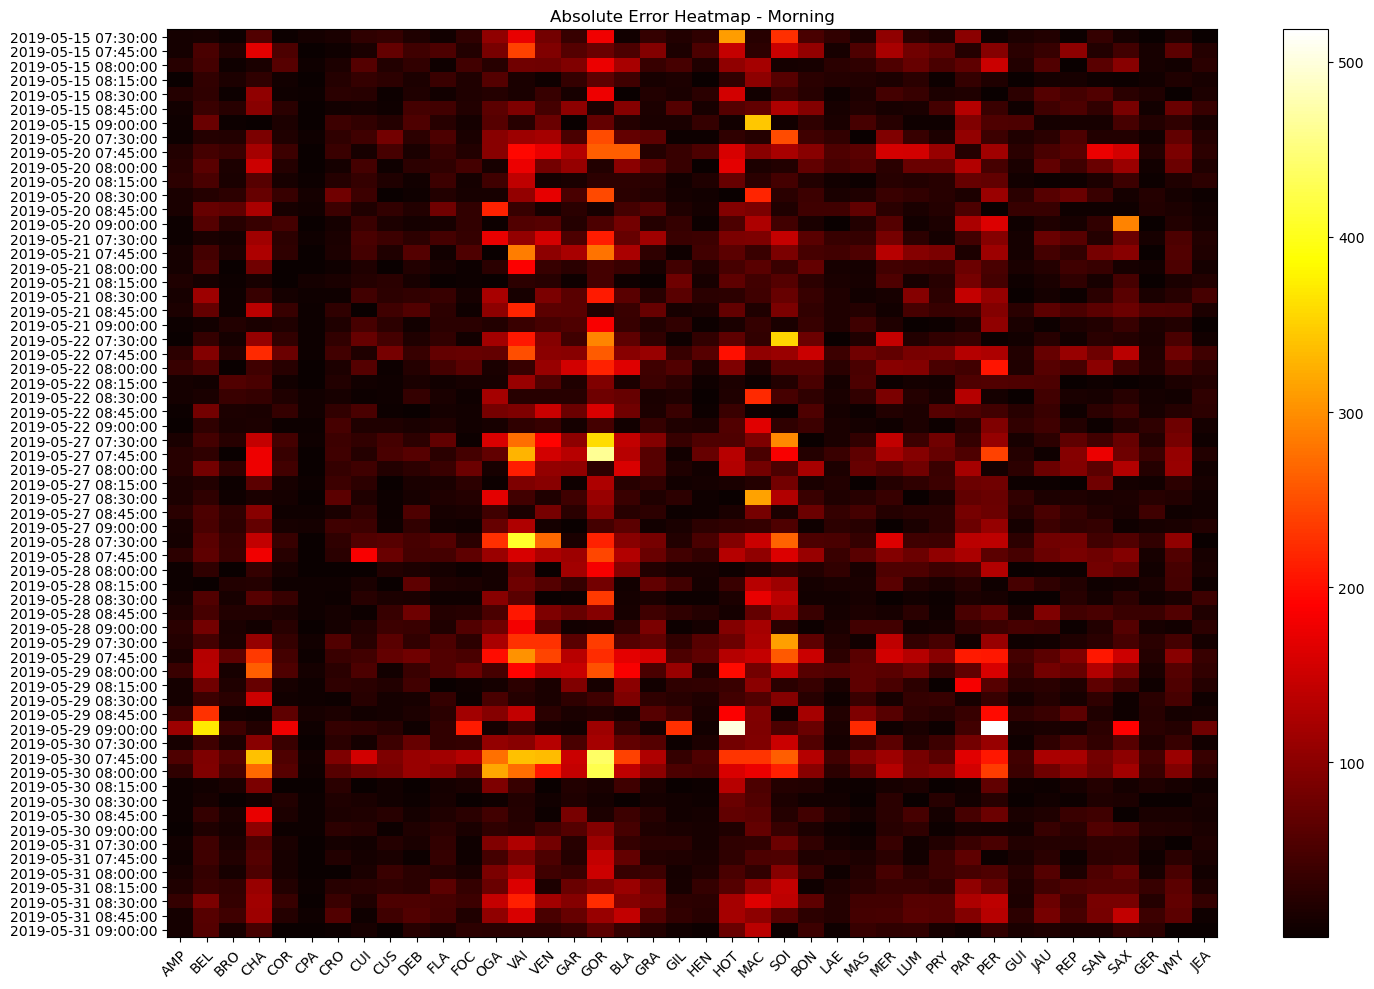

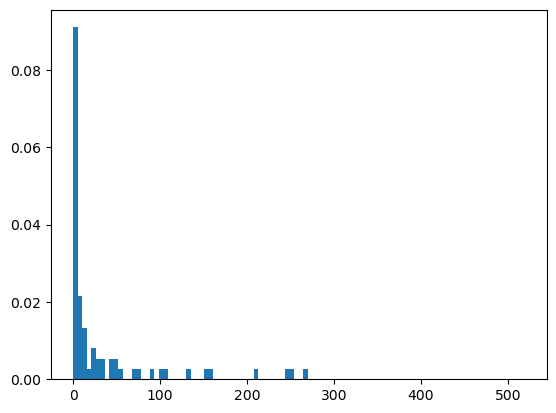

In [136]:

for index_dates,moment in zip([morning_working_days,evening_working_days,peak_hours_working_days],['morning','evening','peak_hours']):
    print(f"Evaluating {moment} moments")
    tensor_index = torch.Tensor(index_dates.index).long()
    abs_error_moment = torch.index_select(abs_error,0,tensor_index)
    mean_abs_error_moment = abs_error_moment.mean(axis=[0,1]).numpy()
    print(f"Mean absolute error for {moment} at horizon {'/'.join(list(map(str,list(range(args.horizon_step,args.step_ahead+1,args.horizon_step)))))}: {mean_abs_error_moment}")
    
    # Plot heatmap
    abs_error_moment_h = abs_error_moment[...,horizon]
    plot_heatmap(abs_error_moment_h.numpy(), 
                xlabel =ds.spatial_unit , 
                ylabel = index_dates,
                title=f"Absolute Error Heatmap - {moment.capitalize()}",
                figsize=(15, 10)) 
    
    hist,bins = np.histogram(abs_error_moment_h,bins=100)
    plt.hist(hist,bins,density=True)
    plt.show()
    break

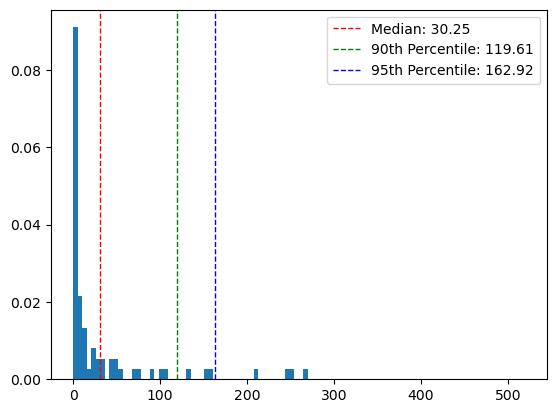

In [138]:
hist,bins = np.histogram(abs_error_moment_h,bins=100)
plt.hist(hist,bins,density=True)
## Add vertical axis to median, quantile 90 and quantile 95
median = np.median(abs_error_moment_h)
quantile_90 = np.quantile(abs_error_moment_h, 0.9)
quantile_95 = np.quantile(abs_error_moment_h, 0.95)
plt.axvline(median, color='r', linestyle='dashed', linewidth=1, label=f'Median: {median:.2f}')
plt.axvline(quantile_90, color='g', linestyle='dashed', linewidth=1, label=f'90th Percentile: {quantile_90:.2f}')
plt.axvline(quantile_95, color='b', linestyle='dashed', linewidth=1, label=f'95th Percentile: {quantile_95:.2f}')
plt.legend()
plt.show()

## Analysing CRITER

In [ ]:
from examples.train_model import main
import torch 
import importlib
from examples.benchmark import local_get_args
from utils.rng import set_seed
from examples.train_and_visu_non_recurrent import evaluate_config
import matplotlib.pyplot as plt
import numpy as np
import os 
import geopandas as gpd

station = [96]
target_data = 'CRITER' # 'subway_in' # 
model_name = 'STAEformer' # 'STGCN', 'ASTGCN' # 'STGformer' #'STAEformer' # 'DSTRformer'

config_file = importlib.import_module(f"constants.config_by_datasets.{target_data}.{model_name}")
importlib.reload(config_file)
modification = config_file.config
SEED = config_file.SEED

modification.update({'num_workers' : 4, # 0,1,2, 4, 6, 8 ... A l'IDRIS ils bossent avec 6 num workers par A100 80GB
                    'persistent_workers' : True ,# False 
                    'pin_memory' : True ,# False 
                    'prefetch_factor' : 4, # None, 2,3,4,5 ... 
                    'drop_last' : False,  # True
                    'mixed_precision' : False, # True # False
                    'torch_compile' : False, # 'compile' # 'jit_script' #'trace' # False
                    'device': torch.device('cuda:0'),
                    'epochs': 40
})

args_init = local_get_args(model_name,
                args_init = None,
                dataset_names=modification['dataset_names'],
                dataset_for_coverage=modification['dataset_for_coverage'],
                modification = modification)

set_seed(SEED)


# Run the script
fold_to_evaluate=[args_init.K_fold-1]

if False:
    trial_id = f"{args_init.model_name}_{'_'.join(args_init.dataset_names)}_fold_{str(fold_to_evaluate[0])}_epochs_{args_init.epochs}"
    save_folder = f"K_fold_validation/training_wo_HP_tuning/{trial_id}"
    print(f"Save folder: {save_folder}")
    trainer,ds,model,args = main(fold_to_evaluate,save_folder,modification)

training_mode_to_visualise = ['test'] # ['test','valid','train']
(trainer,ds,ds_no_shuffle,args) = evaluate_config(args_init=args_init,
                                                  modification=modification,
                                                  fold_to_evaluate= fold_to_evaluate,
                                                  station=station,
                                                   training_mode_to_visualise=training_mode_to_visualise,
                                                   type_POIs = ['iris','iris','iris'],#['iris','iris','iris','iris','iris'],  #'stadium'
                                                   spatial_units = ['Charmettes', 'Charles Hernu', 'Les Brotteaux'], #['Charmettes', 'Charles Hernu', 'Les Brotteaux', 'Bellecombe-Thiers', 'Tonkin Sud'],  #'Matmut Stadium Gerland',
                                                   apps = ['Deezer'], #['Instagram','Google_Maps','Twitter'],
                                                   POI_or_stations = ['POI','POI','POI'],#['POI','POI','POI','POI','POI',], #'POI',
                                                   transfer_modes =['DL'], #['DL','UL'],
                                                   expanded= '',
                                                   individual_poi = False,
                                                   sum_ts_pois = True
                                                   )